# Figure Refine

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.sparse import coo_matrix
from utils.viz import heatmap
from utilities import mkdir

In [3]:
work_dir = '/data/RaoHiC/results/MISC'
mkdir(work_dir)

In [4]:
def read_signicants(fithic_dir, n, pass_num):
    print(f'Reading {fithic_dir}/chr{n}/***.pass{pass_num}_sig.gz')
    sigfile_hic = os.path.join(fithic_dir, f'chr{n}/hic.pass{pass_num}_spline.significant.gz')
    sig_hic = pd.read_csv(sigfile_hic, sep='\t', compression='gzip')

    sigfile_down = os.path.join(fithic_dir, f'chr{n}/downhic.pass{pass_num}_spline.significant.gz')
    sig_down = pd.read_csv(sigfile_down, sep='\t', compression='gzip')

    sigfile_plus = os.path.join(fithic_dir, f'chr{n}/hicplus.pass{pass_num}_spline.significant.gz')
    sig_plus = pd.read_csv(sigfile_plus, sep='\t', compression='gzip')

    sigfile_deep = os.path.join(fithic_dir, f'chr{n}/deephic.pass{pass_num}_spline.significant.gz')
    sig_deep = pd.read_csv(sigfile_deep, sep='\t', compression='gzip')
    return sig_hic, sig_down, sig_plus, sig_deep

In [5]:
def sig_matrix(sig_hic, resolution=10_000):
    sig_hic = sig_hic[sig_hic.contactType == 'intraInRange'].reset_index()
    sig_hic = sig_hic[sig_hic.q_vals < 1.0].reset_index()
    row = sig_hic.locus1.values // resolution
    col = sig_hic.locus2.values // resolution
    data = sig_hic.q_vals.values
    nsize = np.max([row, col]) + 1
    sig_mat = coo_matrix((data, (row, col)), shape=(nsize, nsize)).toarray()
    sig_mat[sig_mat == 0] = 1
    return -np.log(sig_mat)

In [6]:
def make_mark(sig_hic, resolution=10_000):
    sig_mark = sig_hic[sig_hic.q_vals < np.percentile(sig_hic.q_vals.values, 0.5)]
    row = sig_mark.locus1.values // resolution
    col = sig_mark.locus2.values // resolution
    data = sig_mark.q_vals.values + np.NaN
    print(f'Length: {len(row)}')
    nsize = np.max([row, col]) + 1
    mark_mat = coo_matrix((data, (row, col)), shape=(nsize, nsize)).toarray()
    return mark_mat

## Fig. 3A

In [7]:
fithic_dir = '/data/RaoHiC/results/GM12878/40kb/pfithic_output/'
sig_orig, sig_down, sig_plus, sig_deep = read_signicants(fithic_dir, 17, 2)

orighic_17_mark = make_mark(sig_orig)[4250:4350, 4250:4350]
downhic_17_mark = make_mark(sig_down)[4250:4350, 4250:4350]
plushic_17_mark = make_mark(sig_plus)[4250:4350, 4250:4350]
deephic_17_mark = make_mark(sig_deep)[4250:4350, 4250:4350]

Reading /data/RaoHiC/results/GM12878/40kb/pfithic_output//chr17/***.pass2_sig.gz
Length: 4758
Length: 4736
Length: 4757
Length: 4758


In [8]:
data = np.load('/data/RaoHiC/predict/GM12878/predict_chr17_40kb.npz')

orighic_raw = data['hic']
downhic_raw = data['downhic']
plushic_raw = data['hicplus']
deephic_raw = data['deephic']

orighic_raw = orighic_raw / np.max(orighic_raw)
downhic_raw = downhic_raw / np.max(downhic_raw)
plushic_raw = plushic_raw / np.max(plushic_raw)

orighic_17_raw = orighic_raw[4250:4350, 4250:4350]
downhic_17_raw = downhic_raw[4250:4350, 4250:4350]
plushic_17_raw = plushic_raw[4250:4350, 4250:4350]
deephic_17_raw = deephic_raw[4250:4350, 4250:4350]

In [9]:
fithic_dir = '/data/RaoHiC/results/GM12878/40kb/pfithic_output/'
sig_orig, sig_down, sig_plus, sig_deep = read_signicants(fithic_dir, 19, 2)

orighic_19_mark = make_mark(sig_orig)[1780:1880, 1780:1880]
downhic_19_mark = make_mark(sig_down)[1780:1880, 1780:1880]
plushic_19_mark = make_mark(sig_plus)[1780:1880, 1780:1880]
deephic_19_mark = make_mark(sig_deep)[1780:1880, 1780:1880]

Reading /data/RaoHiC/results/GM12878/40kb/pfithic_output//chr19/***.pass2_sig.gz
Length: 3451
Length: 3452
Length: 3453
Length: 3453


In [10]:
data = np.load('/data/RaoHiC/predict/GM12878/predict_chr19_40kb.npz')

orighic_raw = data['hic']
downhic_raw = data['downhic']
plushic_raw = data['hicplus']
deephic_raw = data['deephic']

orighic_raw = orighic_raw / np.max(orighic_raw)
downhic_raw = downhic_raw / np.max(downhic_raw)
plushic_raw = plushic_raw / np.max(plushic_raw)

orighic_19_raw = orighic_raw[1780:1880, 1780:1880]
downhic_19_raw = downhic_raw[1780:1880, 1780:1880]
plushic_19_raw = plushic_raw[1780:1880, 1780:1880]
deephic_19_raw = deephic_raw[1780:1880, 1780:1880]

In [11]:
fithic_dir = '/data/RaoHiC/results/GM12878/40kb/pfithic_output/'
sig_orig, sig_down, sig_plus, sig_deep = read_signicants(fithic_dir, 22, 2)

orighic_22_mark = make_mark(sig_orig)[2300:2400, 2300:2400]
downhic_22_mark = make_mark(sig_down)[2300:2400, 2300:2400]
plushic_22_mark = make_mark(sig_plus)[2300:2400, 2300:2400]
deephic_22_mark = make_mark(sig_deep)[2300:2400, 2300:2400]

Reading /data/RaoHiC/results/GM12878/40kb/pfithic_output//chr22/***.pass2_sig.gz
Length: 2991
Length: 2686
Length: 2993
Length: 2993


In [12]:
data = np.load('/data/RaoHiC/predict/GM12878/predict_chr22_40kb.npz')

orighic_raw = data['hic']
downhic_raw = data['downhic']
plushic_raw = data['hicplus']
deephic_raw = data['deephic']

orighic_raw = orighic_raw / np.max(orighic_raw)
downhic_raw = downhic_raw / np.max(downhic_raw)
plushic_raw = plushic_raw / np.max(plushic_raw)

orighic_22_raw = orighic_raw[2300:2400, 2300:2400]
downhic_22_raw = downhic_raw[2300:2400, 2300:2400]
plushic_22_raw = plushic_raw[2300:2400, 2300:2400]
deephic_22_raw = deephic_raw[2300:2400, 2300:2400]

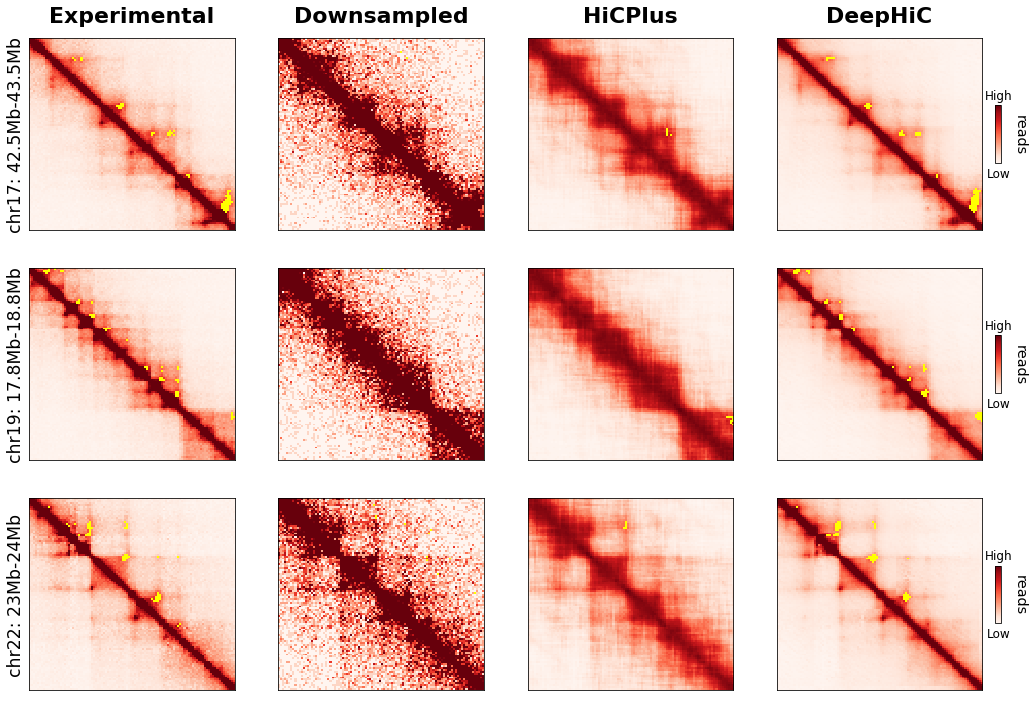

In [13]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=[18, 12], gridspec_kw = {'width_ratios':[1, 1, 1, 1.25]})

heatmap(axs[0,0], orighic_17_raw+orighic_17_mark, show_bar=False, close_ticks=True)
axs[0,0].set_title('Experimental', fontsize='22', fontweight='semibold')
axs[0,0].set_ylabel('chr17: 42.5Mb-43.5Mb', fontsize='xx-large')
heatmap(axs[0,1], downhic_17_raw+downhic_17_mark, show_bar=False, close_ticks=True)
axs[0,1].set_title('Downsampled', fontsize='22', fontweight='semibold')
heatmap(axs[0,2], plushic_17_raw+plushic_17_mark, show_bar=False, close_ticks=True)
axs[0,2].set_title('HiCPlus', fontsize='22', fontweight='semibold')
heatmap(axs[0,3], deephic_17_raw+deephic_17_mark, close_ticks=True)
axs[0,3].set_title('DeepHiC', fontsize='22', fontweight='semibold')

heatmap(axs[1,0], orighic_19_raw+orighic_19_mark, show_bar=False, close_ticks=True)
axs[1,0].set_ylabel('chr19: 17.8Mb-18.8Mb', fontsize='xx-large')
heatmap(axs[1,1], downhic_19_raw+downhic_19_mark, show_bar=False, close_ticks=True)
heatmap(axs[1,2], plushic_19_raw+plushic_19_mark, show_bar=False, close_ticks=True)
heatmap(axs[1,3], deephic_19_raw+deephic_19_mark, close_ticks=True)

heatmap(axs[2,0], orighic_22_raw+orighic_22_mark, show_bar=False, close_ticks=True)
axs[2,0].set_ylabel('chr22: 23Mb-24Mb', fontsize='xx-large')
heatmap(axs[2,1], downhic_22_raw+downhic_22_mark, show_bar=False, close_ticks=True)
heatmap(axs[2,2], plushic_22_raw+plushic_22_mark, show_bar=False, close_ticks=True)
heatmap(axs[2,3], deephic_22_raw+deephic_22_mark, close_ticks=True)

svg_file = os.path.join(work_dir, f'fig3a_loops.svg')
eps_file = os.path.join(work_dir, f'fig3a_loops.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')

## Fig. 3B

In [14]:
orig_sig_num = list(map(lambda x: np.isnan(x).sum(), [orighic_17_mark, orighic_19_mark, orighic_22_mark]))
down_sig_num = list(map(lambda x: np.isnan(x).sum(), [downhic_17_mark, downhic_19_mark, downhic_22_mark]))
plus_sig_num = list(map(lambda x: np.isnan(x).sum(), [plushic_17_mark, plushic_19_mark, plushic_22_mark]))
deep_sig_num = list(map(lambda x: np.isnan(x).sum(), [deephic_17_mark, deephic_19_mark, deephic_22_mark]))

In [15]:
fill_color = (191. / 255., 209. / 256., 212. / 255.)

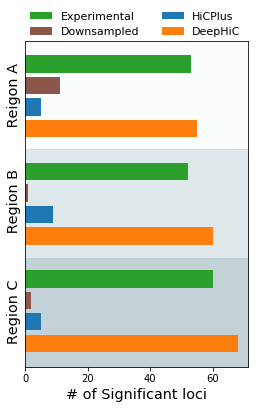

In [16]:
base_pos = np.array([1, 6, 11])
fig, ax = plt.subplots(figsize=(4,6))
ax.barh(base_pos+3, orig_sig_num, color='C2', label='Experimental')
ax.barh(base_pos+2, down_sig_num, color='C5', label='Downsampled')
ax.barh(base_pos+1, plus_sig_num, color='C0', label='HiCPlus')
ax.barh(base_pos+0, deep_sig_num, color='C1', label='DeepHiC')
left, right = ax.get_xlim()
bottom, top = ax.get_ylim()

ax.legend(bbox_to_anchor=(0.43, 1.00, 0.58, 0.12), ncol=2, fontsize='11', frameon=False)
ax.set_xlabel('# of Significant loci', fontsize='x-large')
ax.set_xlim(left=left, right=right)
ax.set_yticks([])
ax.set_ylim(bottom=bottom, top=top)
ax.set_ylabel('Region C          Region B         Reigon A', fontsize='x-large')

x  = np.linspace(0, right, 200)
y1 = np.zeros(200) + bottom
y2 = y1 + (top-bottom)/3
y3 = y1 + 2*(top-bottom)/3
y4 = y1 + top

ax.fill_between(x, y1, y2, color=fill_color, alpha=0.95)
ax.fill_between(x, y2, y3, color=fill_color, alpha=0.5)
ax.fill_between(x, y3, y4, color=fill_color, alpha=0.05)

svg_file = os.path.join(work_dir, f'fig3b_nums.svg')
eps_file = os.path.join(work_dir, f'fig3b_nums.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')

## Fig. 3C & D

In [17]:
sig_corr_gm12878 = np.loadtxt('/data/RaoHiC/results/GM12878/40kb/visual/sig_corr/data/allchr_mean_result.csv')

In [18]:
sig_distjac_gm12878 = np.loadtxt('/data/RaoHiC/results/GM12878/40kb/visual/distjac/data/allchr_distjacs.csv')

In [19]:
xticks = sig_corr_gm12878[:, 0].astype(int)

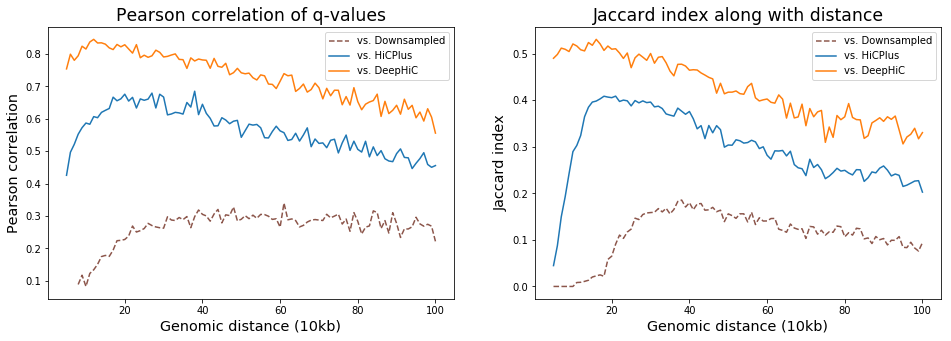

In [20]:
fig = plt.figure(figsize= [16, 5])
ax = fig.add_subplot(1, 2, 1)
ax.plot(xticks[:96], sig_corr_gm12878[:96, 1], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(xticks[:96], sig_corr_gm12878[:96, 2], label='vs. HiCPlus', color='C0')
ax.plot(xticks[:96], sig_corr_gm12878[:96, 3], label='vs. DeepHiC', color='C1')
ax.set_title('Pearson correlation of q-values', fontsize='xx-large')
ax.set_xlabel('Genomic distance (10kb)', fontsize='x-large')
ax.set_ylabel('Pearson correlation', fontsize='x-large')
ax.legend()
ax = fig.add_subplot(1, 2, 2)
ax.plot(xticks[:96], sig_distjac_gm12878[1:97, 5], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(xticks[:96], sig_distjac_gm12878[1:97, 6], label='vs. HiCPlus', color='C0')
ax.plot(xticks[:96], sig_distjac_gm12878[1:97, 7], label='vs. DeepHiC', color='C1')
ax.set_title('Jaccard index along with distance', fontsize='xx-large')
ax.set_xlabel('Genomic distance (10kb)', fontsize='x-large')
ax.set_ylabel('Jaccard index', fontsize='x-large')
ax.legend()
svg_file = os.path.join(work_dir, f'fig3cd_sigcorr.svg')
eps_file = os.path.join(work_dir, f'fig3cd_sigcorr.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')

## Fig. E & F

In [21]:
cove_data = np.loadtxt('/data/RaoHiC/results/GM12878/40kb/visual/coverage/data/coverage_mean_fdr.csv')
posneg_data_pd = pd.read_csv('/data/RaoHiC/results/K562/40kb/visual/roc_analysis/data/allchr_posneg_scores.csv', sep='\t')

In [22]:
posneg_data = posneg_data_pd.to_dict(orient='list')

In [23]:
from visual_chiapet import roc_curve, auc
def plot_roc(posneg, ax):
    fpr, tpr, _ = roc_curve(posneg['hic'], posneg['neg'])
    auc_score = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'Experimental (AUC={auc_score:.3f})', color='C2')

    fpr, tpr, _ = roc_curve(posneg['downhic'], posneg['neg'])
    auc_score = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'Downsampled (AUC={auc_score:.3f})', color='C5', linestyle='--')

    fpr, tpr, _ = roc_curve(posneg['hicplus'], posneg['neg'])
    auc_score = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'HiCPlus (AUC={auc_score:.3f})', color='C0')

    fpr, tpr, _ = roc_curve(posneg['deephic'], posneg['neg'])
    auc_score = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'DeepHiC (AUC={auc_score:.3f})', color='C1')
    ax.set_xlabel('False positive rate', fontsize='x-large')
    ax.set_ylabel('True positive rate', fontsize='x-large')
    ax.set_title('ROC curves in K562 cell line', fontsize='xx-large')
    ax.legend()

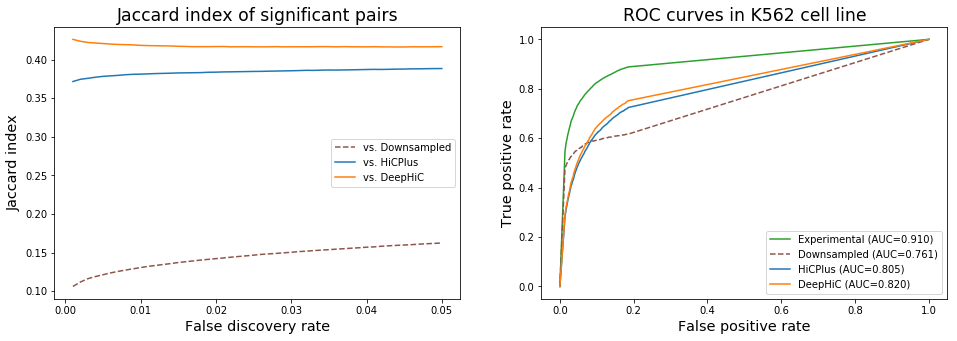

In [24]:
fig = plt.figure(figsize= [16, 5])
ax = fig.add_subplot(1, 2, 1)
ax.plot(cove_data[:,0], cove_data[:, 1], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(cove_data[:,0], cove_data[:, 2], label='vs. HiCPlus', color='C0')
ax.plot(cove_data[:,0], cove_data[:, 3], label='vs. DeepHiC', color='C1')
ax.set_title('Jaccard index of significant pairs', fontsize='xx-large')
ax.set_xlabel('False discovery rate', fontsize='x-large')
ax.set_ylabel('Jaccard index', fontsize='x-large')
ax.legend()
ax = fig.add_subplot(1, 2, 2)
plot_roc(posneg_data, ax)
svg_file = os.path.join(work_dir, f'fig3ef_jacroc.svg')
eps_file = os.path.join(work_dir, f'fig3ef_jacroc.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')

## Supp. Fig. Frequency

In [25]:
chrns = list(range(1, 23)) + ['X']
cols = {'HiCPlus': 3, 'Experimental': 1, 'DeepHiC': 4}

In [26]:
data_fdr = []
data_chr = []
data_typ = []
for n in chrns:
    file = f'/data/RaoHiC/results/GM12878/40kb/visual/coverage/data/fdr_frequency_chr{n}.csv'
    mat = np.loadtxt(file)
    length = len(mat)
    data_chr.extend([str(n)] * length * 3)
    for col in cols.keys():
        data_fdr.append(mat[:,cols[col]])
        data_typ.extend([col] * length)
data_fdr = np.concatenate(data_fdr)

In [27]:
data = pd.DataFrame({'chr': data_chr, 'types': data_typ, 'fdr': data_fdr})

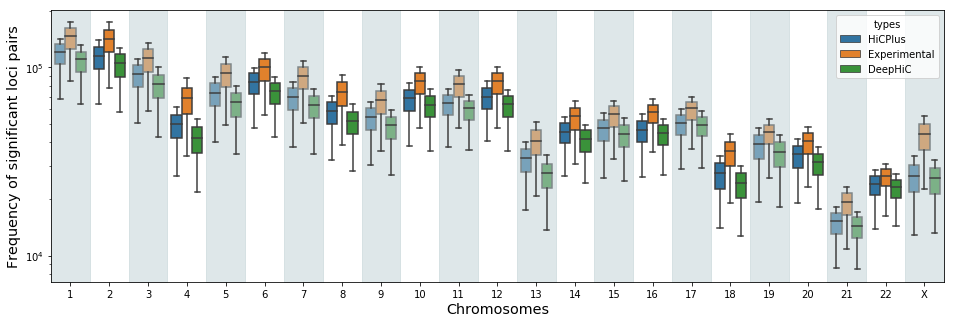

In [28]:
fig = plt.figure(figsize=[16, 5])
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x="chr", y="fdr", hue="types", data=data, ax=ax)
ax.set_xlabel('Chromosomes', fontsize='x-large')
ax.set_ylabel('Frequency of significant loci pairs', fontsize='x-large')
ax.set_yscale('log')
left, right = ax.get_xlim()
bottom, top = ax.get_ylim()
ax.set_xlim(left=left, right=right)
ax.set_ylim(bottom=bottom, top=top)

xlim_length = right - left
x_unit = xlim_length / 23
y_bottom = np.zeros(20) + bottom
y_top = np.zeros(20) + top
for i in range(0,23,2):
    x = np.linspace(left+i*x_unit, left+(i+1)*x_unit, 20)
    ax.fill_between(x, y_bottom, y_top, color=fill_color, alpha=0.5)

svg_file = os.path.join(work_dir, f'supp_fig_frequency.svg')
eps_file = os.path.join(work_dir, f'supp_fig_frequency.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')

In [29]:
chrns = list(range(1, 23)) + ['X']
cols = {'HiCPlus': 3, 'DeepHiC': 4}

In [30]:
data_fdr = []
data_chr = []
data_typ = []
for n in chrns:
    file = f'/data/RaoHiC/results/GM12878/40kb/visual/coverage/data/fdr_frequency_chr{n}.csv'
    mat = np.loadtxt(file)
    length = len(mat)
    data_chr.extend([str(n)] * length * 2)
    for col in cols.keys():
        data_fdr.append(np.abs(mat[:,cols[col]] - mat[:, 1]))
        data_typ.extend([col] * length)
data_fdr = np.concatenate(data_fdr)

In [31]:
data = pd.DataFrame({'chr': data_chr, 'types': data_typ, 'fdr': data_fdr})

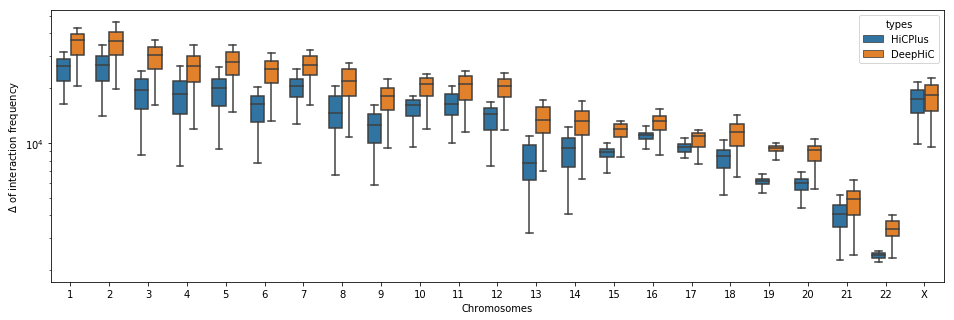

In [32]:
fig = plt.figure(figsize=[16, 5])
ax = fig.add_subplot(1, 1, 1)
ax = sns.boxplot(x="chr", y="fdr", hue="types", data=data, width=0.7, fliersize=0)
ax.set_yscale('log')
ax.set_ylabel('$\Delta$ of interaction frequency')
ax.set_xlabel('Chromosomes');

## Supplementary Figure S11

### GM12878R

In [19]:
sig_corr_gm12878r = np.loadtxt('/data/RaoHiC/results/GM12878R/40kb/visual/sig_corr/data/allchr_mean_result.csv')
sig_distjac_gm12878r = np.loadtxt('/data/RaoHiC/results/GM12878R/40kb/visual/distjac/data/allchr_distjacs.csv')
cove_data = np.loadtxt('/data/RaoHiC/results/GM12878R/40kb/visual/coverage/data/coverage_mean_fdr.csv')

In [20]:
xticks = sig_corr_gm12878r[:, 0].astype(int)

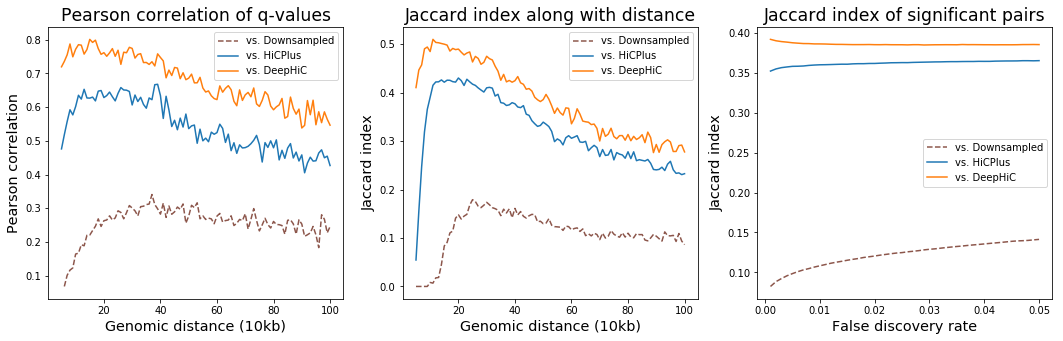

In [21]:
fig = plt.figure(figsize= [18, 5])
ax = fig.add_subplot(1, 3, 1)
ax.plot(xticks[:96], sig_corr_gm12878r[:96, 1], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(xticks[:96], sig_corr_gm12878r[:96, 2], label='vs. HiCPlus', color='C0')
ax.plot(xticks[:96], sig_corr_gm12878r[:96, 3], label='vs. DeepHiC', color='C1')
ax.set_title('Pearson correlation of q-values', fontsize='xx-large')
ax.set_xlabel('Genomic distance (10kb)', fontsize='x-large')
ax.set_ylabel('Pearson correlation', fontsize='x-large')
ax.legend()
ax = fig.add_subplot(1, 3, 2)
ax.plot(xticks[:96], sig_distjac_gm12878r[1:97, 5], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(xticks[:96], sig_distjac_gm12878r[1:97, 6], label='vs. HiCPlus', color='C0')
ax.plot(xticks[:96], sig_distjac_gm12878r[1:97, 7], label='vs. DeepHiC', color='C1')
ax.set_title('Jaccard index along with distance', fontsize='xx-large')
ax.set_xlabel('Genomic distance (10kb)', fontsize='x-large')
ax.set_ylabel('Jaccard index', fontsize='x-large')
ax.legend()

ax = fig.add_subplot(1, 3, 3)
ax.plot(cove_data[:,0], cove_data[:, 1], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(cove_data[:,0], cove_data[:, 2], label='vs. HiCPlus', color='C0')
ax.plot(cove_data[:,0], cove_data[:, 3], label='vs. DeepHiC', color='C1')
ax.set_title('Jaccard index of significant pairs', fontsize='xx-large')
ax.set_xlabel('False discovery rate', fontsize='x-large')
ax.set_ylabel('Jaccard index', fontsize='x-large')
ax.legend()

svg_file = os.path.join(work_dir, f'supp_fig_loops_gm12878r.svg')
eps_file = os.path.join(work_dir, f'supp_fig_loops_gm12878r.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')

### K562

In [22]:
sig_corr_gm12878r = np.loadtxt('/data/RaoHiC/results/K562/40kb/visual/sig_corr/data/allchr_mean_result.csv')
sig_distjac_gm12878r = np.loadtxt('/data/RaoHiC/results/K562/40kb/visual/distjac/data/allchr_distjacs.csv')
cove_data = np.loadtxt('/data/RaoHiC/results/K562/40kb/visual/coverage/data/coverage_mean_fdr.csv')

In [23]:
xticks = sig_corr_gm12878r[:, 0].astype(int)

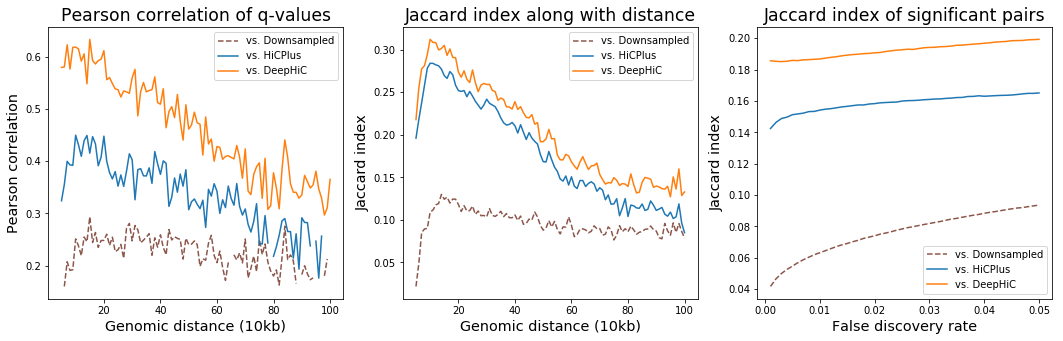

In [24]:
fig = plt.figure(figsize= [18, 5])
ax = fig.add_subplot(1, 3, 1)
ax.plot(xticks[:96], sig_corr_gm12878r[:96, 1], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(xticks[:96], sig_corr_gm12878r[:96, 2], label='vs. HiCPlus', color='C0')
ax.plot(xticks[:96], sig_corr_gm12878r[:96, 3], label='vs. DeepHiC', color='C1')
ax.set_title('Pearson correlation of q-values', fontsize='xx-large')
ax.set_xlabel('Genomic distance (10kb)', fontsize='x-large')
ax.set_ylabel('Pearson correlation', fontsize='x-large')
ax.legend()
ax = fig.add_subplot(1, 3, 2)
ax.plot(xticks[:96], sig_distjac_gm12878r[1:97, 5], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(xticks[:96], sig_distjac_gm12878r[1:97, 6], label='vs. HiCPlus', color='C0')
ax.plot(xticks[:96], sig_distjac_gm12878r[1:97, 7], label='vs. DeepHiC', color='C1')
ax.set_title('Jaccard index along with distance', fontsize='xx-large')
ax.set_xlabel('Genomic distance (10kb)', fontsize='x-large')
ax.set_ylabel('Jaccard index', fontsize='x-large')
ax.legend()

ax = fig.add_subplot(1, 3, 3)
ax.plot(cove_data[:,0], cove_data[:, 1], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(cove_data[:,0], cove_data[:, 2], label='vs. HiCPlus', color='C0')
ax.plot(cove_data[:,0], cove_data[:, 3], label='vs. DeepHiC', color='C1')
ax.set_title('Jaccard index of significant pairs', fontsize='xx-large')
ax.set_xlabel('False discovery rate', fontsize='x-large')
ax.set_ylabel('Jaccard index', fontsize='x-large')
ax.legend()

svg_file = os.path.join(work_dir, f'supp_fig_loops_k562.svg')
eps_file = os.path.join(work_dir, f'supp_fig_loops_k562.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')

### IMR90

In [25]:
sig_corr_gm12878r = np.loadtxt('/data/RaoHiC/results/IMR90/40kb/visual/sig_corr/data/allchr_mean_result.csv')
sig_distjac_gm12878r = np.loadtxt('/data/RaoHiC/results/IMR90/40kb/visual/distjac/data/allchr_distjacs.csv')
cove_data = np.loadtxt('/data/RaoHiC/results/IMR90/40kb/visual/coverage/data/coverage_mean_fdr.csv')

In [26]:
xticks = sig_corr_gm12878r[:, 0].astype(int)

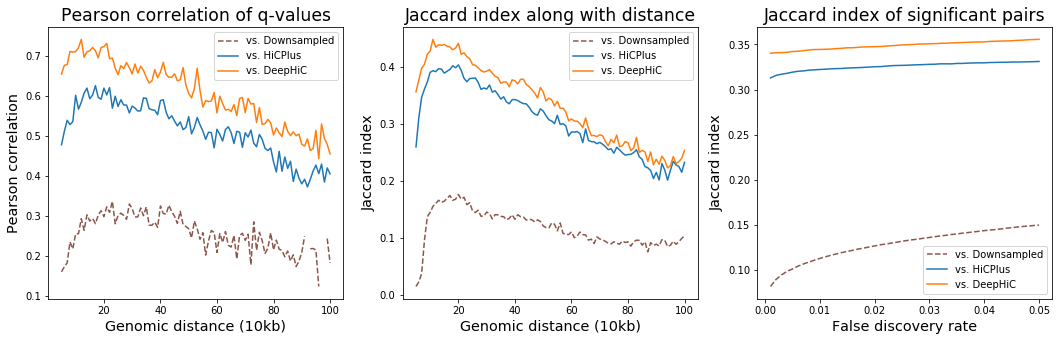

In [27]:
fig = plt.figure(figsize= [18, 5])
ax = fig.add_subplot(1, 3, 1)
ax.plot(xticks[:96], sig_corr_gm12878r[:96, 1], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(xticks[:96], sig_corr_gm12878r[:96, 2], label='vs. HiCPlus', color='C0')
ax.plot(xticks[:96], sig_corr_gm12878r[:96, 3], label='vs. DeepHiC', color='C1')
ax.set_title('Pearson correlation of q-values', fontsize='xx-large')
ax.set_xlabel('Genomic distance (10kb)', fontsize='x-large')
ax.set_ylabel('Pearson correlation', fontsize='x-large')
ax.legend()
ax = fig.add_subplot(1, 3, 2)
ax.plot(xticks[:96], sig_distjac_gm12878r[1:97, 5], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(xticks[:96], sig_distjac_gm12878r[1:97, 6], label='vs. HiCPlus', color='C0')
ax.plot(xticks[:96], sig_distjac_gm12878r[1:97, 7], label='vs. DeepHiC', color='C1')
ax.set_title('Jaccard index along with distance', fontsize='xx-large')
ax.set_xlabel('Genomic distance (10kb)', fontsize='x-large')
ax.set_ylabel('Jaccard index', fontsize='x-large')
ax.legend()

ax = fig.add_subplot(1, 3, 3)
ax.plot(cove_data[:,0], cove_data[:, 1], label='vs. Downsampled', color='C5', linestyle='--')
ax.plot(cove_data[:,0], cove_data[:, 2], label='vs. HiCPlus', color='C0')
ax.plot(cove_data[:,0], cove_data[:, 3], label='vs. DeepHiC', color='C1')
ax.set_title('Jaccard index of significant pairs', fontsize='xx-large')
ax.set_xlabel('False discovery rate', fontsize='x-large')
ax.set_ylabel('Jaccard index', fontsize='x-large')
ax.legend()

svg_file = os.path.join(work_dir, f'supp_fig_loops_imr90.svg')
eps_file = os.path.join(work_dir, f'supp_fig_loops_imr90.eps')
fig.savefig(svg_file, format='svg')
fig.savefig(eps_file, format='eps')